<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span><ul class="toc-item"><li><span><a href="#Plot-clone-fraction" data-toc-modified-id="Plot-clone-fraction-4.1">Plot clone fraction</a></span></li><li><span><a href="#TableS2" data-toc-modified-id="TableS2-4.2">TableS2</a></span></li><li><span><a href="#Plot-Shannon-div" data-toc-modified-id="Plot-Shannon-div-4.3">Plot Shannon div</a></span></li><li><span><a href="#Plot-GLIPH2-number-of-TCR-specificities" data-toc-modified-id="Plot-GLIPH2-number-of-TCR-specificities-4.4">Plot GLIPH2 number of TCR specificities</a></span></li><li><span><a href="#Table-S3" data-toc-modified-id="Table-S3-4.5">Table S3</a></span></li><li><span><a href="#Add-heatmap-for-sample-origin" data-toc-modified-id="Add-heatmap-for-sample-origin-4.6">Add heatmap for sample origin</a></span></li><li><span><a href="#Add-heatmap-for-tumour-type" data-toc-modified-id="Add-heatmap-for-tumour-type-4.7">Add heatmap for tumour type</a></span></li></ul></li><li><span><a href="#PFS-correlates" data-toc-modified-id="PFS-correlates-5">PFS correlates</a></span><ul class="toc-item"><li><span><a href="#Diversity" data-toc-modified-id="Diversity-5.1">Diversity</a></span><ul class="toc-item"><li><span><a href="#KM" data-toc-modified-id="KM-5.1.1">KM</a></span></li><li><span><a href="#Cox" data-toc-modified-id="Cox-5.1.2">Cox</a></span></li></ul></li><li><span><a href="#GLIPH" data-toc-modified-id="GLIPH-5.2">GLIPH</a></span><ul class="toc-item"><li><span><a href="#KM" data-toc-modified-id="KM-5.2.1">KM</a></span></li><li><span><a href="#Cox" data-toc-modified-id="Cox-5.2.2">Cox</a></span></li></ul></li></ul></li></ul></div>

# Dependencies

In [2]:
library(ggplot2)
library(ComplexHeatmap)
library(circlize)
library(survival)
library(survminer)
library(dplyr)

Loading required package: grid

ComplexHeatmap version 2.6.2
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

This message can be suppressed by:
  suppressPackageStartupMessages(library(ComplexHeatmap))


circlize version 0.4.12
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))


Loading required package: ggpubr


Attaching package: ‘dplyr’



# Functions

In [3]:
source("~/OneDrive - UHN/R_src/ggplot2_theme.R")

In [4]:
source("~/git/PLTK/PLTK/R/Immune_Diversity.R")

In [5]:
origin_hm.fx <- function(origin_mat){

    colpal <- c("Lymph node" = "#b15928",
                "Other tissue" = "#ffff99")

    origin_hm = Heatmap(origin_mat,
                          #titles and names
                          name = "Sample origin",
                          show_row_names = TRUE,
                          show_column_names = FALSE,    
                          #clusters
                          cluster_columns = FALSE,
                          cluster_rows = FALSE,
                          #aesthestics
                          col = colpal,
                          row_names_gp = gpar(fontsize = 20),
                          height = unit(1, "cm"),
                          column_title_gp = gpar(fontsize = 42),
                          row_title = NULL)
    return(origin_hm)
}

In [6]:
cancer_hm.fx <- function(cancer_mat){

    colpal <- c("Lymphoma" = "#2c7fb8",
                "Solid tumour" = "#edf8b1")

    cancer_hm = Heatmap(cancer_mat,
                          #titles and names
                          name = "Cancer group",
                          show_row_names = TRUE,
                          show_column_names = FALSE,    
                          #clusters
                          cluster_columns = FALSE,
                          cluster_rows = FALSE,
                          #aesthestics
                          col = colpal,
                          row_names_gp = gpar(fontsize = 20),
                          height = unit(1, "cm"),
                          column_title_gp = gpar(fontsize = 42),
                          row_title = NULL)
    return(cancer_hm)
}

In [7]:
type_hm.fx <- function(tumortype_mat){

    colpal <- c("Primary" = "#d8daeb",
                "Metastatic" = "#542788")

    type_hm = Heatmap(tumortype_mat,
                          #titles and names
                          name = "Tumour type",
                          show_row_names = TRUE,
                          show_column_names = FALSE,    
                          #clusters
                          cluster_columns = FALSE,
                          cluster_rows = FALSE,
                          #aesthestics
                          col = colpal,
                          row_names_gp = gpar(fontsize = 20),
                          height = unit(1, "cm"),
                          column_title_gp = gpar(fontsize = 42),
                          row_title = NULL)
    return(type_hm)
}

In [8]:
  # Function to align plots (from stackoverflow) 
  align_plots1 <- function (...) {
    pl <- list(...)
    stopifnot(do.call(all, lapply(pl, inherits, "gg")))
    gl <- lapply(pl, ggplotGrob)
    bind2 <- function(x, y) gtable:::rbind_gtable(x, y, "first")
    combined <- Reduce(bind2, gl[-1], gl[[1]])
    wl <- lapply(gl, "[[", "widths")
    combined$widths <- do.call(grid::unit.pmax, wl)
    grid::grid.newpage()
    grid::grid.draw(combined)
  }

# Paths

Mount h4h first

In [9]:
mountpath <- "/Users/anabbi/Desktop/H4H/INDICATE/CapTCR/NovaSeq/ds_ICT/clones/"

In [10]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INDICATE/Manifests/"

# Main

In [11]:
metadata <- read.csv(file.path(datapath,"IND_estimate_metadata_IHC_trb_tmb.csv"),header = T, stringsAsFactors = F, 
                     check.names = F)

In [12]:
metadata_trb <- metadata[ !is.na(metadata$observed_Shannon),]

In [13]:
metadata_trb <- metadata_trb[order(metadata_trb$cancer, metadata_trb$observed_Shannon), ]

In [14]:
dim(metadata_trb)

[1] 45 77

In [15]:
sum(metadata_trb$TRB)

[1] 6247

In [16]:
summary(metadata_trb$observed_Shannon)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   9.527  19.177  79.913  80.269 697.247 

In [17]:
metadata_trb$sampleorigin <- NA

metadata_trb$sampleorigin[ metadata_trb$sample_origin == "Lymph node"] <- "LN"
metadata_trb$sampleorigin[ metadata_trb$sample_origin != "Lymph node"] <- "Others"

In [18]:
tapply(metadata_trb$observed_Shannon, metadata_trb$sampleorigin, summary)

$LN
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.81   80.27  188.54  253.13  368.10  697.25 

$Others
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   8.123  15.780  36.609  32.947 238.268 


In [19]:
wilcox.test(metadata_trb$observed_Shannon ~ metadata_trb$sampleorigin)


	Wilcoxon rank sum exact test

data:  metadata_trb$observed_Shannon by metadata_trb$sampleorigin
W = 287, p-value = 0.0001346
alternative hypothesis: true location shift is not equal to 0


In [20]:
tapply(metadata_trb$observed_Shannon, metadata_trb$tumor_type, summary)

$Metastatic
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   7.929  13.553  64.130  19.976 697.247 

$Primary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.813  10.838  31.515  87.804 137.869 380.961 


In [21]:
wilcox.test(metadata_trb$observed_Shannon ~ metadata_trb$tumor_type)


	Wilcoxon rank sum exact test

data:  metadata_trb$observed_Shannon by metadata_trb$tumor_type
W = 151, p-value = 0.07662
alternative hypothesis: true location shift is not equal to 0


In [22]:
tapply(metadata_trb$observed_Shannon, metadata_trb$cancer, summary)

$Lymphoma
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  41.45  147.72  188.54  221.49  361.05  380.96 

$`Solid tumour`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   8.123  13.739  44.517  30.802 697.247 


In [23]:
metadata_trb$sample_id_DNA <- factor(metadata_trb$sample_id_DNA, levels = metadata_trb$sample_id_DNA)

## Plot clone fraction 

In [24]:
flelst <- list.files(mountpath,recursive = TRUE, pattern = "CLONES_TRB")

In [25]:
length(flelst)

[1] 54

In [26]:
i <- 1
  for (f in flelst){
    mixcrfle <- read.table(paste0(mountpath, f), header = TRUE, sep = "\t", stringsAsFactors = F, na.strings = c("", "NA"))
    message("mixcr file: ", f)  
    print(dim(mixcrfle))  
    #remove nonproductive seqs  
    mixcr_productivefle <- mixcrfle[!grepl("_",mixcrfle$aaSeqCDR3)& !grepl("[*]",mixcrfle$aaSeqCDR3),]  
    message("mixcr file with only productive seqs: ", f)  
    print(dim(mixcr_productivefle)) 
    
    #recalculate cloneFraction
    mixcr_productivefle$cloneFraction <- NA
    mixcr_productivefle$cloneFraction <- mixcr_productivefle$cloneCount/sum(mixcr_productivefle$cloneCount)
      
    if(i == 1){
      compldfle <- mixcr_productivefle
      compldfle <- cbind(cloneno = row.names(compldfle), 
                         filename = f, 
                         compldfle)
      i <- i + 1   
    }
    else{
      compldfle1 <- mixcr_productivefle
      compldfle1 <- cbind(cloneno = row.names(compldfle1), filename = f, compldfle1)
      compldfle <- rbind(compldfle, compldfle1)
      rm(compldfle1)
    }
  }


mixcr file: CLONES_TRBICT-06520001B0024D_T_DNA_capTCRseq_S63_L002_1600000.txt



[1] 118  35


mixcr file with only productive seqs: CLONES_TRBICT-06520001B0024D_T_DNA_capTCRseq_S63_L002_1600000.txt



[1] 84 35


mixcr file: CLONES_TRBICT-06520004C0016D_T_DNA_capTCRseq_S76_L002_1600000.txt



[1] 372  35


mixcr file with only productive seqs: CLONES_TRBICT-06520004C0016D_T_DNA_capTCRseq_S76_L002_1600000.txt



[1] 283  35


mixcr file: CLONES_TRBICT-06520007C0016D_T_DNA_capTCRseq_S71_L002_1600000.txt



[1] 310  35


mixcr file with only productive seqs: CLONES_TRBICT-06520007C0016D_T_DNA_capTCRseq_S71_L002_1600000.txt



[1] 231  35


mixcr file: CLONES_TRBICT-06520010B0021D_T_DNA_capTCRseq_S66_L002_1600000.txt



[1] 48 35


mixcr file with only productive seqs: CLONES_TRBICT-06520010B0021D_T_DNA_capTCRseq_S66_L002_1600000.txt



[1] 38 35


mixcr file: CLONES_TRBICT-06520011B0021D_T_DNA_capTCRseq_S70_L002_1600000.txt



[1] 12 35


mixcr file with only productive seqs: CLONES_TRBICT-06520011B0021D_T_DNA_capTCRseq_S70_L002_1600000.txt



[1] 11 35


mixcr file: CLONES_TRBICT-06520017C0016D_T_DNA_capTCRseq_S72_L002_1600000.txt



[1]  7 35


mixcr file with only productive seqs: CLONES_TRBICT-06520017C0016D_T_DNA_capTCRseq_S72_L002_1600000.txt



[1]  5 35


mixcr file: CLONES_TRBICT-06520019C0024D_T_DNA_capTCRseq_S77_L002_1600000.txt



[1] 264  35


mixcr file with only productive seqs: CLONES_TRBICT-06520019C0024D_T_DNA_capTCRseq_S77_L002_1600000.txt



[1] 208  35


mixcr file: CLONES_TRBICT-06520026C0012D_T_DNA_capTCRseq_S75_L002_1600000.txt



[1] 56 35


mixcr file with only productive seqs: CLONES_TRBICT-06520026C0012D_T_DNA_capTCRseq_S75_L002_1600000.txt



[1] 49 35


mixcr file: CLONES_TRBICT-06520030C0016D_T_DNA_capTCRseq_S73_L002_1600000.txt



[1]  4 35


mixcr file with only productive seqs: CLONES_TRBICT-06520030C0016D_T_DNA_capTCRseq_S73_L002_1600000.txt



[1]  3 35


mixcr file: CLONES_TRBICT-06520033C0016D_T_DNA_capTCRseq_S79_L002_1600000.txt



[1] 746  35


mixcr file with only productive seqs: CLONES_TRBICT-06520033C0016D_T_DNA_capTCRseq_S79_L002_1600000.txt



[1] 602  35


mixcr file: CLONES_TRBICT-06520034C0016D_T_DNA_capTCRseq_S86_L002_1600000.txt



[1]  1 35


mixcr file with only productive seqs: CLONES_TRBICT-06520034C0016D_T_DNA_capTCRseq_S86_L002_1600000.txt



[1]  1 35


mixcr file: CLONES_TRBICT-06520038B0024D_T_DNA_capTCRseq_S78_L002_1600000.txt



[1] 10 35


mixcr file with only productive seqs: CLONES_TRBICT-06520038B0024D_T_DNA_capTCRseq_S78_L002_1600000.txt



[1]  9 35


mixcr file: CLONES_TRBICT-06520046C0016D_T_DNA_capTCRseq_S83_L002_1600000.txt



[1] 34 35


mixcr file with only productive seqs: CLONES_TRBICT-06520046C0016D_T_DNA_capTCRseq_S83_L002_1600000.txt



[1] 30 35


mixcr file: CLONES_TRBICT-06520049C0019D_T_DNA_capTCRseq_S67_L002_1600000.txt



[1] 22 35


mixcr file with only productive seqs: CLONES_TRBICT-06520049C0019D_T_DNA_capTCRseq_S67_L002_1600000.txt



[1] 18 35


mixcr file: CLONES_TRBICT-06520058C0044D_T_DNA_capTCRseq_S69_L002_1600000.txt



[1] 220  35


mixcr file with only productive seqs: CLONES_TRBICT-06520058C0044D_T_DNA_capTCRseq_S69_L002_1600000.txt



[1] 170  35


mixcr file: CLONES_TRBICT-06520059B0021D_T_DNA_capTCRseq_S85_L002_1600000.txt



[1] 43 35


mixcr file with only productive seqs: CLONES_TRBICT-06520059B0021D_T_DNA_capTCRseq_S85_L002_1600000.txt



[1] 31 35


mixcr file: CLONES_TRBICT-06520063C0041D_T_DNA_capTCRseq_S84_L002_1600000.txt



[1] 24 35


mixcr file with only productive seqs: CLONES_TRBICT-06520063C0041D_T_DNA_capTCRseq_S84_L002_1600000.txt



[1] 17 35


mixcr file: CLONES_TRBICT-06520067C0016D_T_DNA_capTCRseq_S81_L002_1600000.txt



[1] 36 35


mixcr file with only productive seqs: CLONES_TRBICT-06520067C0016D_T_DNA_capTCRseq_S81_L002_1600000.txt



[1] 29 35


mixcr file: CLONES_TRBICT-06520068B0021D_T_DNA_capTCRseq_S68_L002_1600000.txt



[1] 17 35


mixcr file with only productive seqs: CLONES_TRBICT-06520068B0021D_T_DNA_capTCRseq_S68_L002_1600000.txt



[1] 16 35


mixcr file: CLONES_TRBICT-06520070C0016D_T_DNA_capTCRseq_S82_L002_1600000.txt



[1]  6 35


mixcr file with only productive seqs: CLONES_TRBICT-06520070C0016D_T_DNA_capTCRseq_S82_L002_1600000.txt



[1]  3 35


mixcr file: CLONES_TRBICT-06520071C0018D_T_DNA_capTCRseq_S80_L002_1600000.txt



[1] 42 35


mixcr file with only productive seqs: CLONES_TRBICT-06520071C0018D_T_DNA_capTCRseq_S80_L002_1600000.txt



[1] 31 35


mixcr file: CLONES_TRBICT-06520074C0018D_T_DNA_capTCRseq_S61_L002_1600000.txt



[1] 69 35


mixcr file with only productive seqs: CLONES_TRBICT-06520074C0018D_T_DNA_capTCRseq_S61_L002_1600000.txt



[1] 48 35


mixcr file: CLONES_TRBICT-06520078C0026D_T_DNA_capTCRseq_S64_L002_1600000.txt



[1] 1289   35


mixcr file with only productive seqs: CLONES_TRBICT-06520078C0026D_T_DNA_capTCRseq_S64_L002_1600000.txt



[1] 1020   35


mixcr file: CLONES_TRBICT-06520080B0021D_T_DNA_capTCRseq_S74_L002_1600000.txt



[1] 16 35


mixcr file with only productive seqs: CLONES_TRBICT-06520080B0021D_T_DNA_capTCRseq_S74_L002_1600000.txt



[1] 13 35


mixcr file: CLONES_TRBICT-06520082C0016D_T_DNA_capTCRseq_S62_L002_1600000.txt



[1] 469  35


mixcr file with only productive seqs: CLONES_TRBICT-06520082C0016D_T_DNA_capTCRseq_S62_L002_1600000.txt



[1] 361  35


mixcr file: CLONES_TRBICT-06520090C0019D_T_DNA_capTCRseq_S65_L002_1600000.txt



[1] 2266   35


mixcr file with only productive seqs: CLONES_TRBICT-06520090C0019D_T_DNA_capTCRseq_S65_L002_1600000.txt



[1] 1796   35


mixcr file: CLONES_TRBICT-6201764804-02_T_DNA_capTCRseq_S39_L002_1600000.txt



[1] 19 35


mixcr file with only productive seqs: CLONES_TRBICT-6201764804-02_T_DNA_capTCRseq_S39_L002_1600000.txt



[1] 18 35


mixcr file: CLONES_TRBICT-6201764818-01_T_DNA_capTCRseq_S47_L002_1600000.txt



[1] 25 35


mixcr file with only productive seqs: CLONES_TRBICT-6201764818-01_T_DNA_capTCRseq_S47_L002_1600000.txt



[1] 18 35


mixcr file: CLONES_TRBICT-6201764824-02_T_DNA_capTCRseq_S41_L002_1600000.txt



[1] 65 35


mixcr file with only productive seqs: CLONES_TRBICT-6201764824-02_T_DNA_capTCRseq_S41_L002_1600000.txt



[1] 50 35


mixcr file: CLONES_TRBICT-6201815172-01_T_DNA_capTCRseq_S48_L002_1600000.txt



[1] 384  35


mixcr file with only productive seqs: CLONES_TRBICT-6201815172-01_T_DNA_capTCRseq_S48_L002_1600000.txt



[1] 299  35


mixcr file: CLONES_TRBICT-6201815273-02_T_DNA_capTCRseq_S60_L002_1600000.txt



[1] 23 35


mixcr file with only productive seqs: CLONES_TRBICT-6201815273-02_T_DNA_capTCRseq_S60_L002_1600000.txt



[1] 16 35


mixcr file: CLONES_TRBICT-6201855900-02_T_DNA_capTCRseq_S31_L002_1600000.txt



[1] 43 35


mixcr file with only productive seqs: CLONES_TRBICT-6201855900-02_T_DNA_capTCRseq_S31_L002_1600000.txt



[1] 28 35


mixcr file: CLONES_TRBICT-6202116713-02_T_DNA_capTCRseq_S59_L002_1600000.txt



[1] 322  35


mixcr file with only productive seqs: CLONES_TRBICT-6202116713-02_T_DNA_capTCRseq_S59_L002_1600000.txt



[1] 243  35


mixcr file: CLONES_TRBICT-6202116728-02_T_DNA_capTCRseq_S40_L002_1600000.txt



[1]  8 35


mixcr file with only productive seqs: CLONES_TRBICT-6202116728-02_T_DNA_capTCRseq_S40_L002_1600000.txt



[1]  4 35


mixcr file: CLONES_TRBICT-6202116735-01_T_DNA_capTCRseq_S54_L002_1600000.txt



[1]  2 35


mixcr file with only productive seqs: CLONES_TRBICT-6202116735-01_T_DNA_capTCRseq_S54_L002_1600000.txt



[1]  1 35


mixcr file: CLONES_TRBICT-6202116747_T_DNA_capTCRseq_S50_L002_1600000.txt



[1]  7 35


mixcr file with only productive seqs: CLONES_TRBICT-6202116747_T_DNA_capTCRseq_S50_L002_1600000.txt



[1]  2 35


mixcr file: CLONES_TRBICT-6202218209-01_T_DNA_capTCRseq_S58_L002_1600000.txt



[1] 691  35


mixcr file with only productive seqs: CLONES_TRBICT-6202218209-01_T_DNA_capTCRseq_S58_L002_1600000.txt



[1] 545  35


mixcr file: CLONES_TRBICT-6202255794-02_T_DNA_capTCRseq_S37_L002_1600000.txt



[1] 211  35


mixcr file with only productive seqs: CLONES_TRBICT-6202255794-02_T_DNA_capTCRseq_S37_L002_1600000.txt



[1] 151  35


mixcr file: CLONES_TRBICT-6202261663-02_T_DNA_capTCRseq_S57_L002_1600000.txt



[1] 11 35


mixcr file with only productive seqs: CLONES_TRBICT-6202261663-02_T_DNA_capTCRseq_S57_L002_1600000.txt



[1] 10 35


mixcr file: CLONES_TRBICT-6202277503-02_T_DNA_capTCRseq_S35_L002_1600000.txt



[1] 22 35


mixcr file with only productive seqs: CLONES_TRBICT-6202277503-02_T_DNA_capTCRseq_S35_L002_1600000.txt



[1] 18 35


mixcr file: CLONES_TRBICT-6202549619-02_T_DNA_capTCRseq_S33_L002_1600000.txt



[1] 17 35


mixcr file with only productive seqs: CLONES_TRBICT-6202549619-02_T_DNA_capTCRseq_S33_L002_1600000.txt



[1] 13 35


mixcr file: CLONES_TRBICT-6202785779-02_T_DNA_capTCRseq_S32_L002_1600000.txt



[1] 62 35


mixcr file with only productive seqs: CLONES_TRBICT-6202785779-02_T_DNA_capTCRseq_S32_L002_1600000.txt



[1] 50 35


mixcr file: CLONES_TRBICT-6202994429-02_T_DNA_capTCRseq_S56_L002_1600000.txt



[1] 60 35


mixcr file with only productive seqs: CLONES_TRBICT-6202994429-02_T_DNA_capTCRseq_S56_L002_1600000.txt



[1] 44 35


mixcr file: CLONES_TRBICT-6203065383-03_T_DNA_capTCRseq_S46_L002_1600000.txt



[1] 338  35


mixcr file with only productive seqs: CLONES_TRBICT-6203065383-03_T_DNA_capTCRseq_S46_L002_1600000.txt



[1] 267  35


mixcr file: CLONES_TRBICT-6203065392-02_T_DNA_capTCRseq_S43_L002_1600000.txt



[1] 604  35


mixcr file with only productive seqs: CLONES_TRBICT-6203065392-02_T_DNA_capTCRseq_S43_L002_1600000.txt



[1] 489  35


mixcr file: CLONES_TRBICT-6203065431-03_T_DNA_capTCRseq_S38_L002_1600000.txt



[1] 24 35


mixcr file with only productive seqs: CLONES_TRBICT-6203065431-03_T_DNA_capTCRseq_S38_L002_1600000.txt



[1] 19 35


mixcr file: CLONES_TRBICT-6203065432-01_T_DNA_capTCRseq_S34_L002_1600000.txt



[1] 12 35


mixcr file with only productive seqs: CLONES_TRBICT-6203065432-01_T_DNA_capTCRseq_S34_L002_1600000.txt



[1]  6 35


mixcr file: CLONES_TRBICT-6203065440-02_T_DNA_capTCRseq_S36_L002_1600000.txt



[1]  6 35


mixcr file with only productive seqs: CLONES_TRBICT-6203065440-02_T_DNA_capTCRseq_S36_L002_1600000.txt



[1]  5 35


mixcr file: CLONES_TRBICT-6203065456-02_T_DNA_capTCRseq_S52_L002_1600000.txt



[1] 806  35


mixcr file with only productive seqs: CLONES_TRBICT-6203065456-02_T_DNA_capTCRseq_S52_L002_1600000.txt



[1] 626  35


mixcr file: CLONES_TRBICT-6204179150-01_T_DNA_capTCRseq_S55_L002_1600000.txt



[1] 90 35


mixcr file with only productive seqs: CLONES_TRBICT-6204179150-01_T_DNA_capTCRseq_S55_L002_1600000.txt



[1] 74 35


mixcr file: CLONES_TRBICT-6501799176-02_T_DNA_capTCRseq_S53_L002_1600000.txt



[1] 36 35


mixcr file with only productive seqs: CLONES_TRBICT-6501799176-02_T_DNA_capTCRseq_S53_L002_1600000.txt



[1] 26 35


mixcr file: CLONES_TRBICT-6502064156-02_T_DNA_capTCRseq_S51_L002_1600000.txt



[1] 18 35


mixcr file with only productive seqs: CLONES_TRBICT-6502064156-02_T_DNA_capTCRseq_S51_L002_1600000.txt



[1] 13 35


mixcr file: CLONES_TRBICT-6502168706_T_DNA_capTCRseq_S42_L002_1600000.txt



[1] 141  35


mixcr file with only productive seqs: CLONES_TRBICT-6502168706_T_DNA_capTCRseq_S42_L002_1600000.txt



[1] 109  35


mixcr file: CLONES_TRBICT-6502553313-02_T_DNA_capTCRseq_S49_L002_1600000.txt



[1] 244  35


mixcr file with only productive seqs: CLONES_TRBICT-6502553313-02_T_DNA_capTCRseq_S49_L002_1600000.txt



[1] 179  35


In [27]:
head(compldfle)

,cloneno,filename,cloneId,cloneCount,cloneFraction,clonalSequence,clonalSequenceQuality,allVHitsWithScore,allDHitsWithScore,allJHitsWithScore,⋯,nSeqFR4,minQualFR4,aaSeqFR1,aaSeqCDR1,aaSeqFR2,aaSeqCDR2,aaSeqFR3,aaSeqCDR3,aaSeqFR4,refPoints
,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<lgl>,<chr>
1,1,CLONES_TRBICT-06520001B0024D_T_DNA_capTCRseq_S63_L002_1600000.txt,2,227,0.04844217,TGTGCCAGCAGTTACTCGGGGGGCTACACCTTC,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,TRBV6-5*00(109.3),NA,TRBJ1-2*00(199.8),⋯,NA,NA,NA,NA,NA,NA,NA,CASSYSGGYTF,NA,:::::::::0:1:18:::::21:-8:33:::
2,2,CLONES_TRBICT-06520001B0024D_T_DNA_capTCRseq_S63_L002_1600000.txt,6,214,0.04566795,TGTGCCAGCAGCCCCGATACAGGGGGGTTTACTGAAGCTTTCTTT,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,TRBV7-9*00(655.4),TRBD1*00(40),TRBJ1-1*00(175.4),⋯,NA,NA,NA,NA,NA,NA,NA,CASSPDTGGFTEAFF,NA,:::::::::0:-5:12:18:-3:-1:26:30:-5:45:::
3,3,CLONES_TRBICT-06520001B0024D_T_DNA_capTCRseq_S63_L002_1600000.txt,7,214,0.04566795,TGTGCCAGCAGGCTAACAGGGGGCAACACTGAAGCTTTCTTT,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,TRBV7-2*00(414.1),TRBD1*00(45),TRBJ1-1*00(230.4),⋯,NA,NA,NA,NA,NA,NA,NA,CASRLTGGNTEAFF,NA,:::::::::0:-6:11:15:-3:0:24:24:-2:42:::
4,4,CLONES_TRBICT-06520001B0024D_T_DNA_capTCRseq_S63_L002_1600000.txt,8,198,0.04225352,TGTGCCAGCAGCGCGGACCTAGCGGGAGGTTATACGCAGTATTTT,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,TRBV7-2*00(538.9),TRBD2*00(55),TRBJ2-3*00(183.9),⋯,NA,NA,NA,NA,NA,NA,NA,CASSADLAGGYTQYF,NA,:::::::::0:-5:12:18:-4:-1:29:31:-7:45:::
5,5,CLONES_TRBICT-06520001B0024D_T_DNA_capTCRseq_S63_L002_1600000.txt,21,173,0.03691848,TGTGCCAGCAGCTCCGGGACAGGTTTTCAGCCCCAGCATTTT,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,TRBV7-2*00(740),TRBD1*00(50),TRBJ1-5*00(219.8),⋯,NA,NA,NA,NA,NA,NA,NA,CASSSGTGFQPQHF,NA,:::::::::0:-4:13:13:2:-4:23:26:-6:42:::
7,7,CLONES_TRBICT-06520001B0024D_T_DNA_capTCRseq_S63_L002_1600000.txt,39,143,0.03051643,TGTGCCAGCACCAGAGTTCTTTCCTACAATGAGCAGTTCTTC,FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF,"TRBV11-2*00(554.2),TRBV11-3*00(522.2),TRBV11-1*00(506.2)",NA,TRBJ2-1*00(135),⋯,NA,NA,NA,NA,NA,NA,NA,CASTRVLSYNEQFF,NA,:::::::::0:-7:10:::::21:-1:42:::


In [28]:
dim(compldfle)

[1] 8430   37

In [29]:
compldfle$samplename <- gsub("CLONES_TRB", "", compldfle$filename)
compldfle$samplename <- gsub("_DNA.*", "",compldfle$samplename)
compldfle$cloneno <- formatC(compldfle$cloneno, 
                             width=nchar(max(as.numeric(compldfle$cloneno))), flag="0")

subset to those in metadata

In [30]:
compldfle <- compldfle[compldfle$samplename %in% metadata_trb$sample_id_DNA,]

In [31]:
length(unique(compldfle$samplename))

[1] 45

In [32]:
dim(compldfle)

[1] 6247   38

## TableS2

In [33]:
xlsx::write.xlsx(compldfle, file = "~/OneDrive - UHN/Documents/Manuscripts/INDICATE/v2/TableS2.xlsx",row.names = F)

How many public cdr3?

In [34]:
tmp <- as.data.frame(table(compldfle$nSeqCDR3))

In [35]:
tmp[ tmp$Freq > 1,]

,Var1,Freq
,<fct>,<int>
308,TGCAGTGCTAGAAGGGAGGAGGGGAGAATCAACACTGAAGCTTTCTTT,2
350,TGCAGTGCTAGAGACCGATATGGGCCGTCCGCTGAAGCTTTCTTT,2
483,TGCAGTGCTAGCCTCCCATTTAACAATGAGCAGTTCTTC,2
1350,TGTGCCAATAAGCGGGAGCCTTGCCATGAGCAGTTCTTC,2
1397,TGTGCCACCAGCAGAGATCCTTCGGGTTGGTCCACAGATACGCAGTATTTT,2
1673,TGTGCCAGCACCAACCCAGGGTCTGGGGCCAACGTCCTGACTTTC,2
2359,TGTGCCAGCAGCCCCCCTAGCGGGGACTACGAGCAGTACTTC,2
3264,TGTGCCAGCAGCTTAGAGTACGAGCAGTACTTC,2
3475,TGTGCCAGCAGCTTCAGAGCGGGAGCCCTCTACAATGAGCAGTTCTTC,2


In [36]:
13/6247

[1] 0.002080999

In [37]:
compldfle$samplename <- factor(compldfle$samplename, levels = metadata_trb$sample_id_DNA)

In [38]:
  clonenocol = rep("#ffffff", 
                     nlevels(as.factor(compldfle$cloneno)))
  
  clonpt <- ggplot(data = compldfle, 
                  aes(y = cloneFraction, 
                      x = samplename, 
                      fill = cloneno)) + 
    geom_bar(colour = "#000000", stat="identity", width = 0.8) +
    theme(axis.title.x = element_blank(),
          axis.text.x = element_blank(),
          axis.line = element_line(color = "black"),
          axis.text = element_text(size = 20),
          axis.title = element_text(size = 20), 
          legend.position = "none") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",
                                          colour = NA),
          panel.border=element_blank(),
          plot.margin = unit(c(0,0,0,0),"cm")) +
    scale_fill_manual(values = clonenocol,
                      guide = FALSE) 


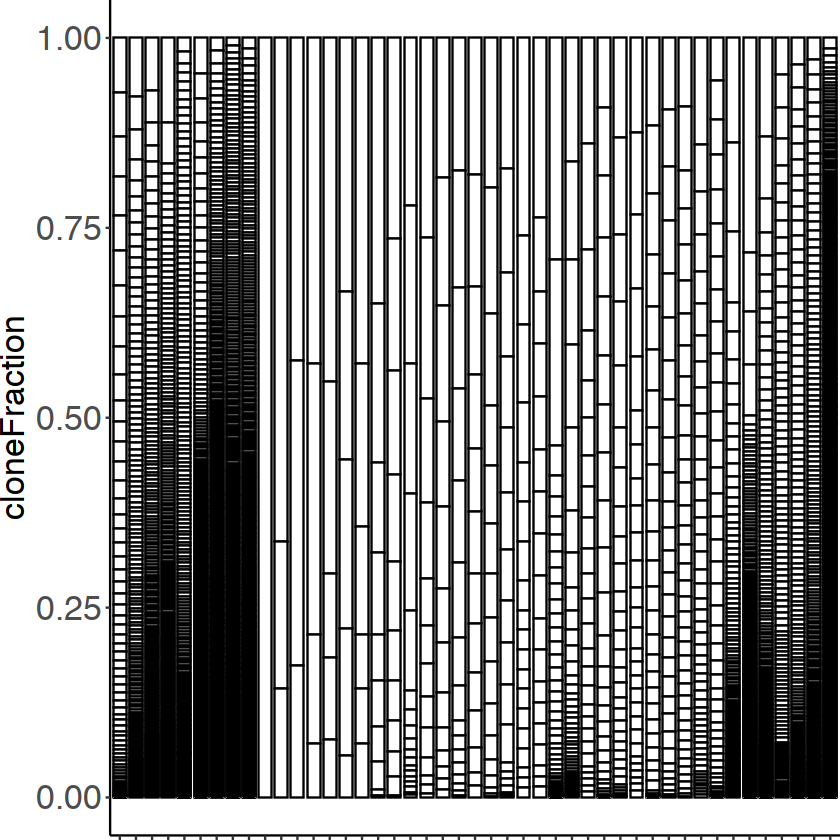

In [39]:
clonpt

## Plot Shannon div

In [40]:
summary(metadata_trb$observed_Shannon)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   9.527  19.177  79.913  80.269 697.247 

In [41]:
metadata_trb$Div_group <- NA
metadata_trb$Div_group[metadata_trb$observed_Shannon >= 80.269] <- "High"

metadata_trb$Div_group[metadata_trb$observed_Shannon < 80.269 &
                       metadata_trb$observed_Shannon > 9.527] <- "Intermediate"

metadata_trb$Div_group[metadata_trb$observed_Shannon <= 9.527] <- "Low"

In [42]:
colpal <- c("High" = "#ED2024",
            "Intermediate" = "#adadad",
            "Low" = "#3953A4")

In [43]:
divplot <- ggplot(data = metadata_trb, 
                  aes(y = observed_Shannon, 
                      x = sample_id_DNA)) + 
    geom_bar(aes(fill = Div_group),colour = "#000000", stat="identity", width = 0.8) +
    theme(axis.title.x = element_blank(),
          axis.text.x = element_blank(),
          axis.line = element_line(color = "black"),
          axis.text = element_text(size = 20),
          axis.title = element_text(size = 20), 
          legend.position = "none") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",
                                          colour = NA),
          panel.border=element_blank(),
          plot.margin = unit(c(0,0,0,0),"cm")) 

In [44]:
divplot <- divplot + annotation_logticks(sides = "l") +
scale_y_continuous(trans = "log10") + scale_fill_manual(values = colpal)

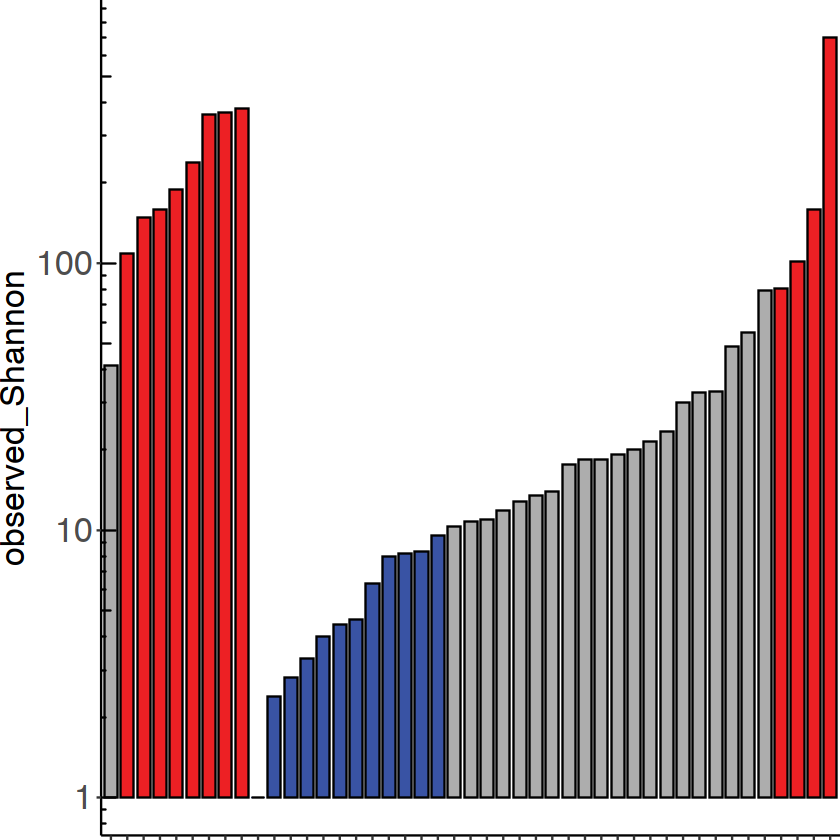

In [45]:
divplot

## Plot GLIPH2 number of TCR specificities

In [46]:
gliph2 <- read.csv(file.path(datapath,"GLIPH/P2409_WKR0TLACRD_ind_gliph2_refv1_CD48.csv"),header = T, stringsAsFactors = F, 
                     check.names = F)

In [47]:
gliph2 <- gliph2[!grepl(" ",gliph2$type),]

In [48]:
dim(gliph2)

[1] 1020   30

## Table S3

In [49]:
xlsx::write.xlsx(gliph2, file = "~/OneDrive - UHN/Documents/Manuscripts/INDICATE/v2/TableS3.xlsx",row.names = F)

In [50]:
head(gliph2)

,index,pattern,Fisher_score,number_subject,number_unique_cdr3,final_score,hla_score,vb_score,expansion_score,length_score,⋯,HLA-B,HLA-C,HLA-DPA1,HLA-DPB1,HLA-DQA1,HLA-DQB1,HLA-DRB1,HLA-DRB3,HLA-DRB4,HLA-DRB5
,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
752,46,YSSY,1.9e-09,7,8,0.00011,1,0.85,0.4,0.4,⋯,-,-,-,-,-,-,-,-,-,-
753,46,YSSY,1.9e-09,7,8,0.00011,1,0.85,0.4,0.4,⋯,-,-,-,-,-,-,-,-,-,-
754,46,YSSY,1.9e-09,7,8,0.00011,1,0.85,0.4,0.4,⋯,-,-,-,-,-,-,-,-,-,-
755,46,YSSY,1.9e-09,7,8,0.00011,1,0.85,0.4,0.4,⋯,-,-,-,-,-,-,-,-,-,-
756,46,YSSY,1.9e-09,7,8,0.00011,1,0.85,0.4,0.4,⋯,-,-,-,-,-,-,-,-,-,-
757,46,YSSY,1.9e-09,7,8,0.00011,1,0.85,0.4,0.4,⋯,-,-,-,-,-,-,-,-,-,-


In [51]:
# Add number of sample specific gliph types
metadata_trb$gliph2_type <- NA

for(i in 1:nrow(metadata_trb)){
    mysample <- metadata_trb$sample_id_DNA[i]
    mygliph <- gliph2[gliph2$Sample == mysample,]
    gliphtab <- as.data.frame(table(mygliph$type), stringsAsFactors = F)
#count number of gliph types that have more than one cdr3 in a given sample    
    if(nrow(gliphtab) !=0 ){
    metadata_trb$gliph2_type[i] <- nrow(gliphtab[gliphtab$Freq > 1,])}
}

In [52]:
gliphtab

Var1,Freq
<chr>,<int>
global-%ALASSYE,2
global-%GGGSSYNE,1
global-%GNE,1
global-%PTRSSYNE,2
global-%SANTE,2
global-%TGGGNQP,1
global-%TGGK,1
global-%TSGYE,1
global-G%SNQP,1


In [53]:
sum(gliphtab$Freq)

[1] 189

In [54]:
#convert NAs to zero
metadata_trb$gliph2_type[ is.na(metadata_trb$gliph2_type)] <- 0

In [55]:
summary(metadata_trb$gliph2_type)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   4.178   3.000  41.000 

In [56]:
gliphplot <- ggplot(data = metadata_trb, 
                  aes(y = gliph2_type, 
                      x = sample_id_DNA)) + 
    geom_bar(colour = "#000000", fill = "#adadad", stat="identity", width = 0.8) +
    theme(axis.title.x = element_blank(),
          axis.text.x = element_blank(),
          axis.line = element_line(color = "black"),
          axis.text = element_text(size = 20),
          axis.title = element_text(size = 20), 
          legend.position = "none") +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_rect(fill = "transparent",
                                          colour = NA),
          panel.border=element_blank(),
          plot.margin = unit(c(0,0,0,0),"cm")) 

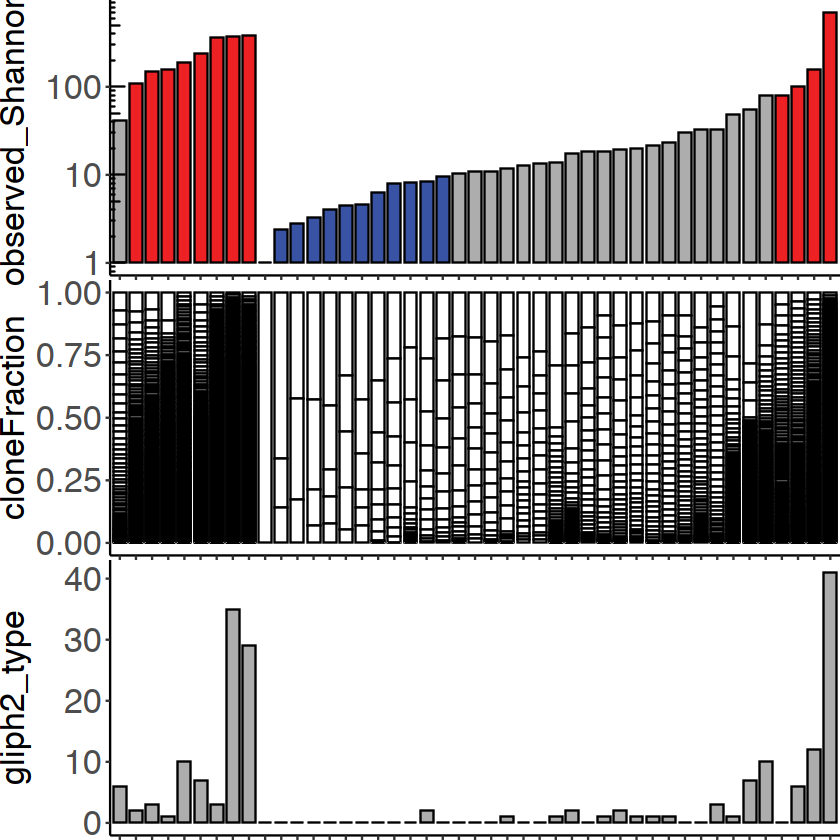

In [57]:
align_plots1(divplot, clonpt, gliphplot)

In [58]:
pdf(file = paste0(plotpath,"TRB_clonplot_wlegend.pdf"),
        width = 20, 
        height = 12,
        useDingbats = FALSE, onefile = F)
divplot + theme(legend.position = "right")
    dev.off()

pdf 
  2

In [59]:
pdf(file = paste0(plotpath,"TRB_clonplot.pdf"),
        width = 20, 
        height = 12,
        useDingbats = FALSE, onefile = F)
align_plots1(divplot, clonpt, gliphplot)
    dev.off()

pdf 
  2

## Add heatmap for sample origin

In [60]:
metadata_trb$origin <- NA
metadata_trb$origin[ metadata_trb$sample_origin == "Lymph node"] <- "Lymph node"
metadata_trb$origin[ metadata_trb$sample_origin != "Lymph node"] <- "Other tissue"

In [61]:
myorigin <- metadata_trb$origin
names(myorigin) <- metadata_trb$sample_id_DNA
myorigin <- t(as.matrix(myorigin))
rownames(myorigin) <- "Lymph node\n/Other tissue"

origin_hm <- origin_hm.fx(myorigin)

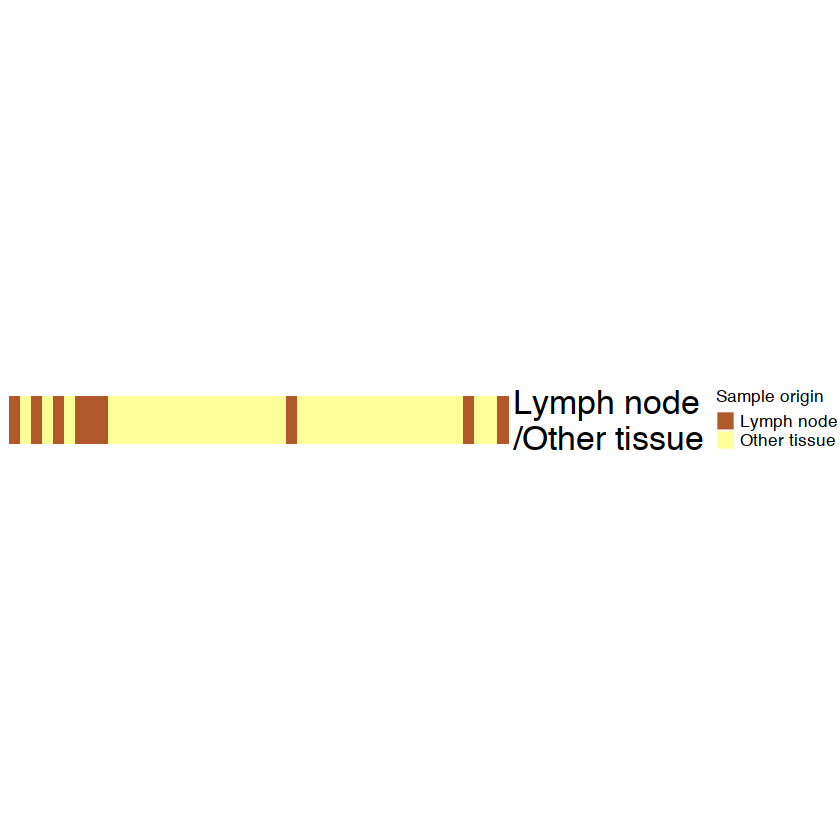

In [62]:
origin_hm

## Add heatmap for tumour type

In [63]:
mytype <- metadata_trb$tumor_type
names(mytype) <- metadata_trb$sample_id_DNA
mytype <- t(as.matrix(mytype))
rownames(mytype) <- "Primary/Metastatic"

type_hm <- type_hm.fx(mytype)

In [64]:
pdf(paste0(plotpath, "type_origin_hm_4TCR.pdf"),
   width = 10, height = 20,
   useDingbats = FALSE)

draw(type_hm %v% origin_hm,heatmap_legend_side = "bottom")

dev.off()

pdf 
  2

# PFS correlates

## Diversity

### KM

In [71]:
summary(metadata_trb$observed_Shannon)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   9.527  19.177  79.913  80.269 697.247 

In [72]:
metadata_trb$log10shann <- log10(metadata_trb$observed_Shannon)

In [73]:
summary(metadata_trb$log10shann)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.979   1.283   1.413   1.905   2.843 

In [74]:
metadata_trb$Div_group <- NA
metadata_trb$Div_group[metadata_trb$log10shann >= 1.905] <- "High"

metadata_trb$Div_group[metadata_trb$log10shann < 1.905 &
                       metadata_trb$log10shann > 0.979] <- "Intermediate"

metadata_trb$Div_group[metadata_trb$log10shann <= 0.979] <- "Low"

In [75]:
table(metadata_trb$Div_group)


        High Intermediate          Low 
          11           22           12 

In [76]:
summary(metadata_trb$log10shann[metadata_trb$Div_group == "High"])
summary(metadata_trb$log10shann[metadata_trb$Div_group == "Intermediate"])
summary(metadata_trb$log10shann[metadata_trb$Div_group == "Low"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.005   2.185   2.275   2.347   2.562   2.843 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.013   1.135   1.294   1.362   1.518   1.905 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.5023  0.6581  0.6484  0.9046  0.9790 

In [77]:
sfit <- survfit(Surv(TRTDUR, progressed)~ Div_group, data= metadata_trb)

kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#adadad", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "PFS analysis of TRB diversity")

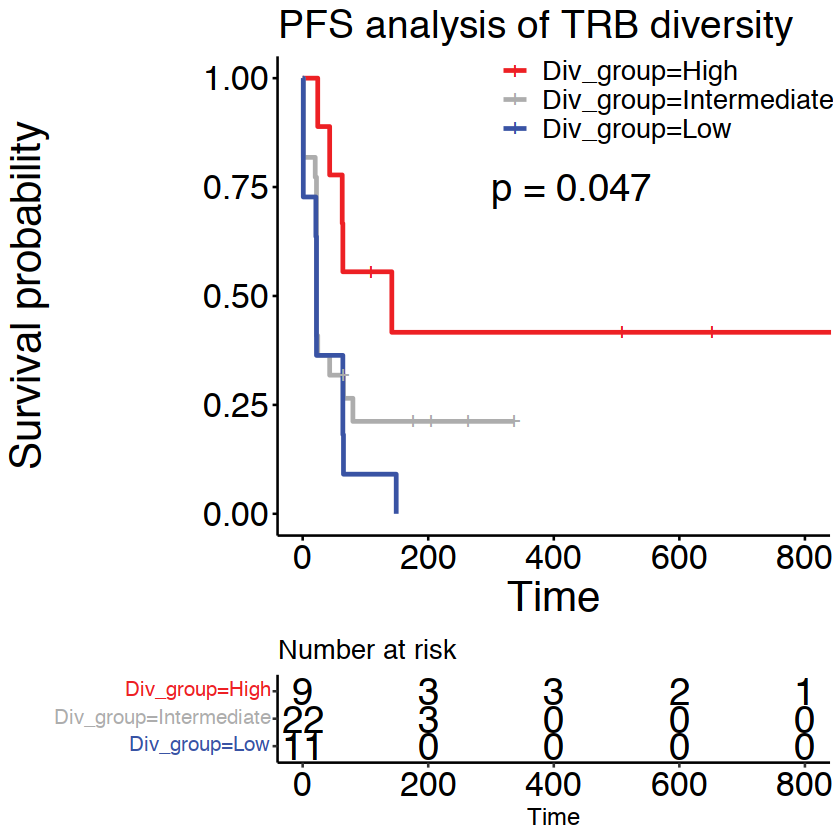

In [78]:
kmplot

In [79]:
pdf(file = paste0(plotpath,"KM_TRB_Div.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

### Cox

In [106]:
colnames(metadata_trb)[colnames(metadata_trb) == "log10shann"] <- "Shannon diversity (log10)"

In [107]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ `Shannon diversity (log10)` + sample_origin + disease_group, data = metadata_trb)
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ `Shannon diversity (log10)` + 
    sample_origin + disease_group, data = metadata_trb)

  n= 42, number of events= 34 
   (3 observations deleted due to missingness)

                                         coef exp(coef)  se(coef)      z
`Shannon diversity (log10)`         -1.231384  0.291888  0.623651 -1.974
sample_originBone                   -1.925964  0.145735  1.090638 -1.766
sample_originBrain                  -1.570180  0.208008  1.414530 -1.110
sample_originConnective/Soft tissue -2.468105  0.084745  1.466217 -1.683
sample_originKidney                 -2.542119  0.078699  1.651907 -1.539
sample_originLung                   -4.300858  0.013557  1.447699 -2.971
sample_originLymph node             -2.948131  0.052438  1.707499 -1.727
sample_originOthers                 -6.004783  0.002467  1.736030 -3.459
disease_groupLymphoma                0.063918  1.066005  1.469205  0.044
disease_groupNBL                    -2.128070  0.11906

In [108]:
library(forestmodel)

In [109]:
trb_cox <- forest_model(coxmodel,exponentiate = TRUE) + labs(title = "Cox for TRB Diversity")

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


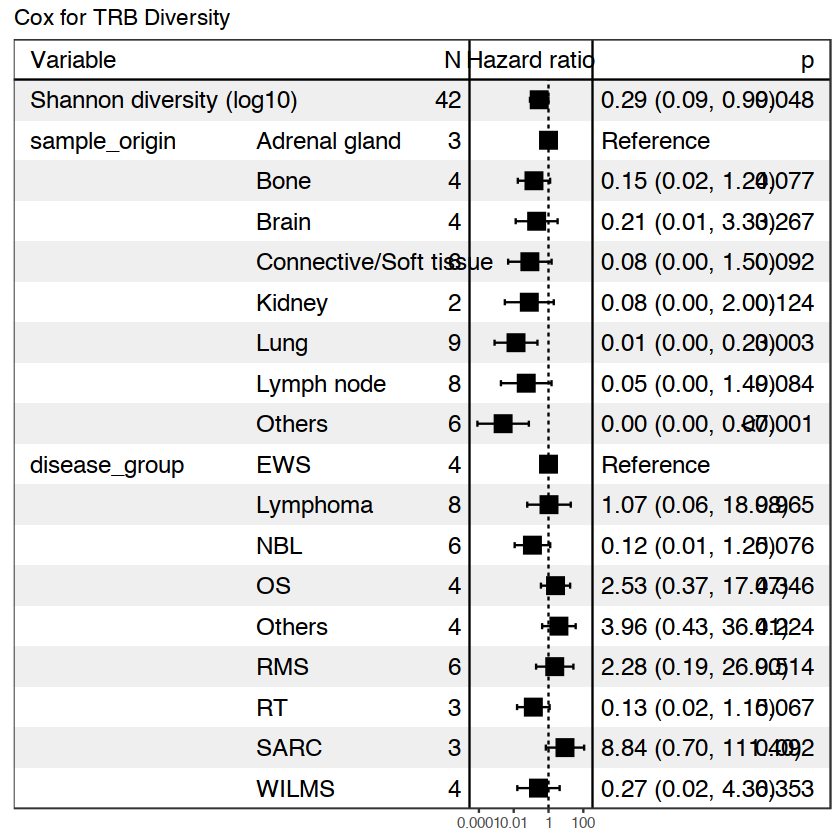

In [110]:
trb_cox

In [111]:
pdf(file = paste0(plotpath,"TRB_Shannon_cox.pdf"),
    width = 8, 
    height = 10,
    useDingbats = FALSE)

trb_cox

dev.off()

pdf 
  2

Take out samples from lymph nodes and do Cox

In [112]:
table(metadata_trb$origin)


  Lymph node Other tissue 
           9           36 

In [113]:
tmp <- metadata_trb[ metadata_trb$origin != "Lymph node",]

In [114]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ `Shannon diversity (log10)` + sample_origin, data = tmp)
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ `Shannon diversity (log10)` + 
    sample_origin, data = tmp)

  n= 34, number of events= 29 
   (2 observations deleted due to missingness)

                                       coef exp(coef) se(coef)      z Pr(>|z|)
`Shannon diversity (log10)`         -0.8771    0.4160   0.4431 -1.979   0.0478
sample_originBone                   -0.7226    0.4855   0.8962 -0.806   0.4201
sample_originBrain                  -0.6408    0.5268   0.8185 -0.783   0.4337
sample_originConnective/Soft tissue  0.1310    1.1399   0.7410  0.177   0.8597
sample_originKidney                 -0.8177    0.4415   1.0135 -0.807   0.4198
sample_originLung                   -0.9441    0.3890   0.7265 -1.299   0.1938
sample_originOthers                 -2.2994    0.1003   0.9750 -2.358   0.0184
                                     
`Shannon diversity (log10)`         *
sample_originBone                    
sample_originBrain                   
sample_originConnective/S

In [301]:
panels <- list(
#left side
  list(width = 0.03),
# variable column    
  list(width = 0.12, display = ~variable, heading = "Variable"),
    list(width = 0.1, display = ~level),
# N column
  list(width = 0.05, display = ~n, hjust = 1, heading = "N (%)"),
# right vertical line for N
    list(width = 0.03, item = "vline", hjust = 0.5),
# forest plot  
    list(width = 0.55, item = "forest", hjust = 0.5, heading = "Hazard ratio", linetype = "dashed", line_x = 0),
# right vertical line for forest    
  list(width = 0.03, item = "vline", hjust = 0.5),
# data column    
  list(width = 5, display = ~ ifelse(reference, "", sprintf("%0.2f (%0.2f, %0.2f)",
    trans(estimate), trans(conf.low), trans(conf.high))), display_na = NA, heading = "HR (%CI)"),
  list(
    width = 5,
    display = ~ ifelse(reference, "", format.pval(p.value, digits = 1, eps = 0.001)),
    display_na = NA, hjust = 1, heading = "p"),
  list(width = 0.08)
)

In [302]:
trb_cox <- forest_model(coxmodel,exponentiate = TRUE, panels) + labs(title = "Cox for TRB Diversity (excluding lymph nodes)")

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


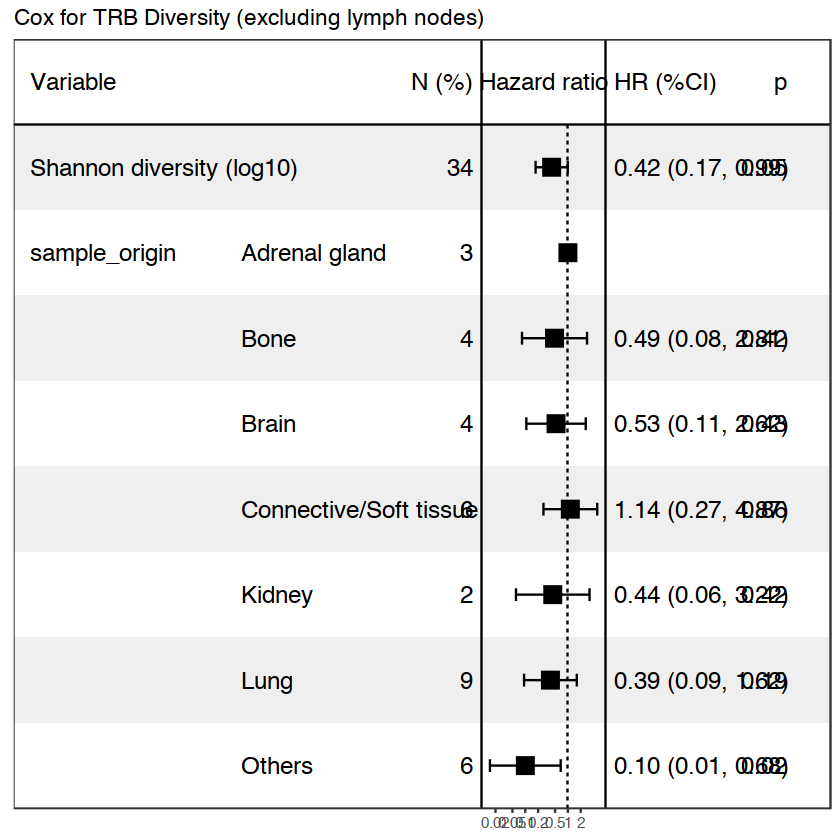

In [303]:
trb_cox

In [304]:
pdf(file = paste0(plotpath,"TRB_Shannon_cox_noLN.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE)

trb_cox

dev.off()

pdf 
  2

## GLIPH

In [94]:
Hmisc:: rcorr(metadata_trb$observed_Shannon, metadata_trb$gliph2_type,
             type = "spearman")

    x   y
x 1.0 0.8
y 0.8 1.0

n= 45 


P
  x  y 
x     0
y  0   

In [95]:
shann_gliph <- ggplot(data = metadata_trb, aes(x = gliph2_type, y = observed_Shannon)) + 
geom_point(size =5) +
 myplot + 
  theme(axis.title = element_text(size = 25),
        axis.line = element_line(color = "black"),
        axis.text.x = element_text(size = 25),
        axis.text.y = element_text(size = 25)) 

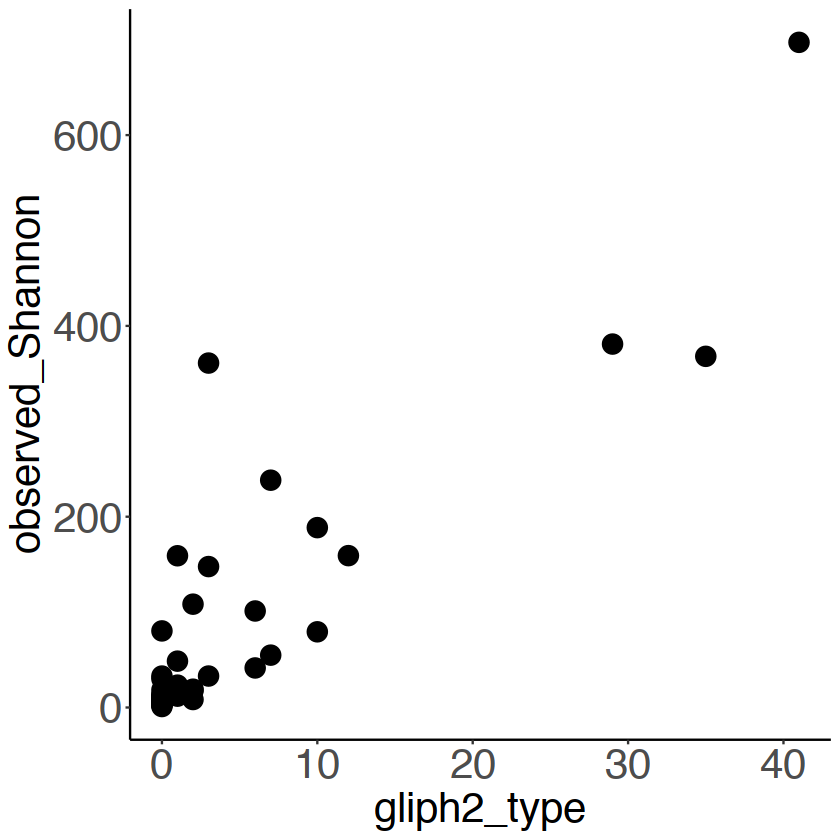

In [96]:
shann_gliph

In [97]:
pdf(file = paste0(plotpath,"Shannon_GLIPH.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
shann_gliph
dev.off()

pdf 
  2

### KM

In [98]:
dim(metadata_trb)

[1] 45 82

In [99]:
summary(metadata_trb$gliph2_type)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   4.178   3.000  41.000 

In [100]:
metadata_trb$gliph <- NA
metadata_trb$gliph[metadata_trb$gliph2_type > 1] <- "High"

metadata_trb$gliph[metadata_trb$gliph2_type <= 1] <- "Low"

In [101]:
table(metadata_trb$gliph)


High  Low 
  17   28 

In [102]:
sfit <- survfit(Surv(TRTDUR, progressed)~ gliph, data= metadata_trb)

kmplot <- ggsurvplot(sfit, conf.int=FALSE, palette = c("#ED2024", "#3953A4"),
                     pval = TRUE, pval.size = 8, pval.coord = c(300, 0.75),
                     risk.table=TRUE, fontsize = 8,
                     legend = c(0.7, 0.95),font.legend = 16, legend.title = "",
                     font.main = 23, font.x = 25,font.y = 25, font.tickslab = 20) 

kmplot$table <- kmplot$table + theme(axis.text.x = element_text(size = 20))
kmplot$plot <- kmplot$plot + labs(title = "PFS of TRB specificity cutoff = 1")

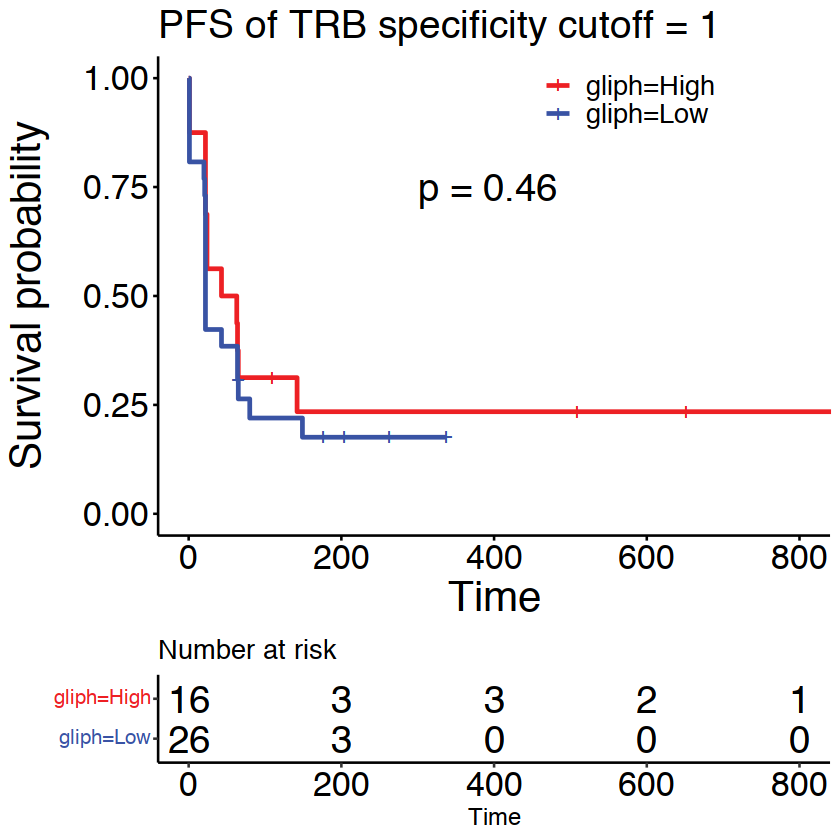

In [103]:
kmplot

In [104]:
pdf(file = paste0(plotpath,"KM_gliph.pdf"),
    width = 10, 
    height = 10,
    useDingbats = FALSE,
    onefile = FALSE)
kmplot
dev.off()

pdf 
  2

### Cox

In [105]:
coxmodel <- coxph(Surv(TRTDUR, progressed) ~ gliph + `Shannon diversity (log10)`, data = metadata_trb)
summary(coxmodel)

Call:
coxph(formula = Surv(TRTDUR, progressed) ~ gliph + `Shannon diversity (log10)`, 
    data = metadata_trb)

  n= 42, number of events= 34 
   (3 observations deleted due to missingness)

                               coef exp(coef) se(coef)      z Pr(>|z|)  
gliphLow                    -0.4941    0.6101   0.5862 -0.843   0.3993  
`Shannon diversity (log10)` -0.6740    0.5097   0.3914 -1.722   0.0851 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                            exp(coef) exp(-coef) lower .95 upper .95
gliphLow                       0.6101      1.639    0.1934     1.925
`Shannon diversity (log10)`    0.5097      1.962    0.2367     1.098

Concordance= 0.626  (se = 0.059 )
Likelihood ratio test= 3.43  on 2 df,   p=0.2
Wald test            = 3.65  on 2 df,   p=0.2
Score (logrank) test = 3.68  on 2 df,   p=0.2
